## Ejemplos segunda unidad PDS
### Análisis de Fourier

## Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sympy as sym
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Serie de Fourier 

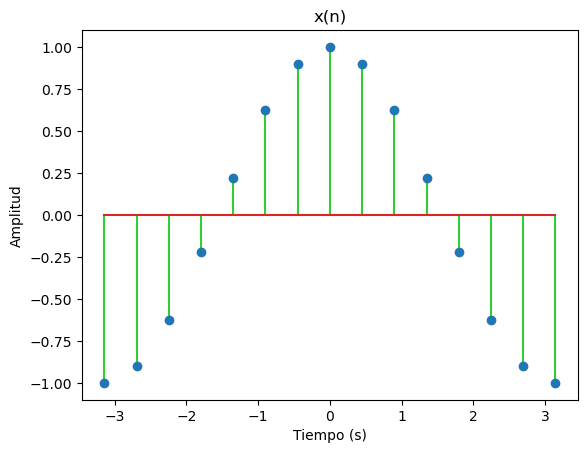

In [10]:
t = np.linspace(-np.pi, np.pi,15)
xn = np.cos(t)

# Graficar la señal 
plt.stem(t, xn, linefmt='limegreen')
plt.title('x(n)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

**Cálculo de coeficientes** 

In [11]:
N = 15
k_max = 10# coeficientes a calcular
re_coef = np.zeros(k_max+1)
ima_coef = np.zeros(k_max+1)
C_k = np.empty(k_max + 1,'complex_') # coeficientes real, imaginaria

for k in range(k_max+1):
    re_coef[k] = 1/N * np.sum(xn * np.cos(2*np.pi*k*t/N))
    ima_coef[k] = 1/N * np.sum(xn * np.sin(2*np.pi*k*t/N))
    C_k[k] = (1/N)*sum((xn)*np.exp((-2j*np.pi*k*t)/N))
   
    
    print(f"El coeficiente par {k} es {re_coef[k]}")
    print(f"El coeficiente impar {k} es {ima_coef[k]}")

El coeficiente par 0 es -0.06666666666666661
El coeficiente impar 0 es 0.0
El coeficiente par 1 es 0.1312876227408142
El coeficiente impar 1 es 0.0
El coeficiente par 2 es 0.4675406001221783
El coeficiente impar 2 es 0.0
El coeficiente par 3 es 0.506785976012838
El coeficiente impar 3 es 0.0
El coeficiente par 4 es 0.19241290776224051
El coeficiente impar 4 es -1.4802973661668754e-17
El coeficiente par 5 es -0.11431762523011162
El coeficiente impar 5 es -1.850371707708594e-17
El coeficiente par 6 es -0.12460383726171623
El coeficiente impar 6 es -2.2204460492503132e-17
El coeficiente par 7 es 0.0441260828582273
El coeficiente impar 7 es 3.7007434154171884e-18
El coeficiente par 8 es 0.10124089582452728
El coeficiente impar 8 es 0.0
El coeficiente par 9 es -0.0071512347966946384
El coeficiente impar 9 es 7.401486830834377e-18
El coeficiente par 10 es -0.08473326622142845
El coeficiente impar 10 es 0.0


**Espectro de potencia**

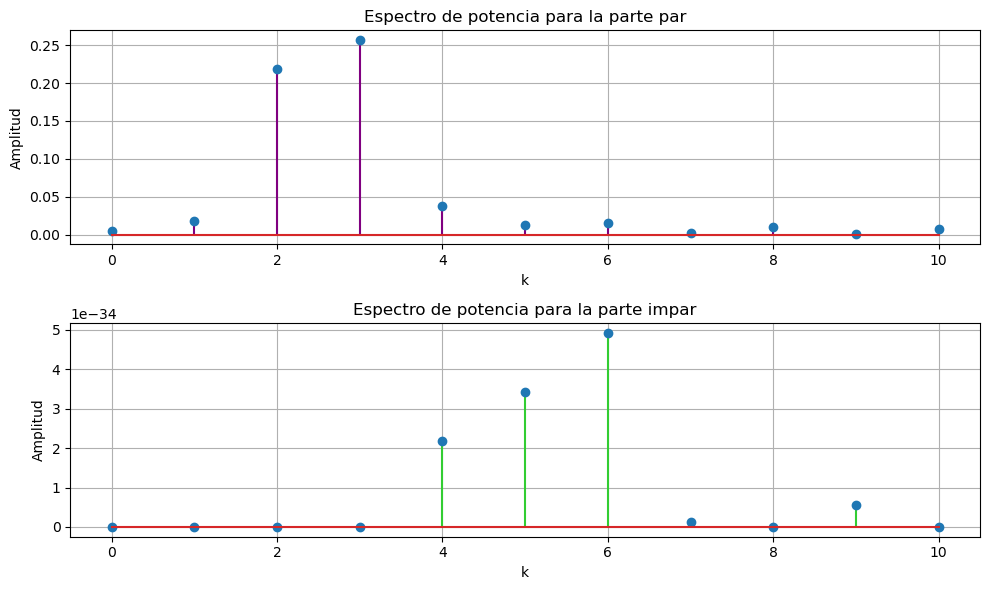

In [12]:
# Calcular espectro de potencia para parte par e impar
senal_par = (re_coef**2)
senal_impar = (ima_coef**2)

# Graficar espectros de potencia
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.stem(range(k_max+1), senal_par, linefmt ='purple')
plt.title('Espectro de potencia para la parte par')
plt.xlabel('k')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(2,1,2)
plt.stem(range(k_max+1), senal_impar,linefmt='limegreen')
plt.title('Espectro de potencia para la parte impar')
plt.xlabel('k')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()

**Densidad espectral de energia señal x(n)**

In [13]:
sxx = []
suma = 0
for i in range(len(xn)):
    sxx.append(np.abs(pow(xn[i], 2)))
    redon= [round(xn, 3) for xn in sxx]
    suma += np.abs(pow(xn[i], 2))
    
print('Secuencia de potencias:',redon)
print('Densidad espectral de energia:',suma)

Secuencia de potencias: [1.0, 0.812, 0.389, 0.05, 0.05, 0.389, 0.812, 1.0, 0.812, 0.389, 0.05, 0.05, 0.389, 0.812, 1.0]
Densidad espectral de energia: 8.0


**Transformada Discreta de Fourier**

Hallar 𝑥4(𝑛) , si 𝑋4(𝑘) = 𝑋2(𝑘)*𝑋1(𝑘)

donde, 𝑥2(𝑛)$ =[2,1,2,1]$ , 𝑥1(𝑛) $= [1,2,3,4]$

**Se hace primero la DTF para x1(n) y x2(n)**

In [10]:
#  DTF para x1 y x2
x1 = [1,2,3,4]
x2 = [2,1,2,1]

N1 = len(x1)
N2 = len(x2)

X1 = []
X2 = []

# Calcular la DTF para cada k
for k in range(N1):
    sum1 = 0
    sum2 = 0
    for n in range(N1):
        sum1 += complex(x1[n]) * sym.exp(-2j * np.pi * n * k / N1)
    for n in range(N2):
        sum2 += complex(x2[n]) * sym.exp(-2j * np.pi * n * k / N2)
    
    X1.append(sum1)
    X2.append(sum2)
    
# Convertir los elementos de las listas a números complejos
X1 = [complex(val) for val in X1]
X2 = [complex(val) for val in X2]

# valores para x1
print('DTF de x1(n):')
for i, val in enumerate(X1):
    if val.imag == 0:
        print(f'X1({i}) = {round(val.real, 2)}')
    else:
        print(f'X1({i}) = {round(val.real, 2)} + {round(val.imag, 2)}j')

# valores  para x2
print('DTF de x2(n):')
for i, val in enumerate(X2):
    if val.imag == 0:
        print(f'X2({i}) = {round(val.real, 2)}')
    else:
        print(f'X2({i}) = {round(val.real, 2)} + {round(val.imag, 2)}j')


DTF de x1(n):
X1(0) = 10.0
X1(1) = -2.0 + 2.0j
X1(2) = -2.0 + -0.0j
X1(3) = -2.0 + -2.0j
DTF de x2(n):
X2(0) = 6.0
X2(1) = -0.0 + -0.0j
X2(2) = 2.0 + 0.0j
X2(3) = 0.0 + -0.0j


El resultado de la DFT es: 

$X1(k) = [10, -2+2j, -2, -2-2j]$

$X2(k) = [6, 0, 2, 0]$


**Se calcula X4(k)**

In [9]:
X_n = []

for i in range(len(X1)):
    X_n.append(X1[i] * X2[i])
print('X4(k): X2(k)*X1(k)')
for i, val in enumerate(X_n):
    if val.imag == 0 :
        print(f'X4({i}) = {round(val.real, 2)}')    
    else:
         print(f'X4({i}) = {round(val.real, 2)} + {round(val.imag, 2)}j')

X4(k): X2(k)*X1(k)
X4(0) = 12.0
X4(1) = 1.5 + 4.33j
X4(2) = 1.5 + -4.33j


$X4(k) = [60, 0, -4, 0 ]$

**Se hace la IDTF  de x4(n)**

In [6]:
N = len(X_n)
X4 = []

# Calcular la DTF para cada frecuencia discreta k
for k in range(N):
    sum = 0    
    for n in range(N):
        sum += complex((1/N)*X_n[n]) * sym.exp(-2j * np.pi * n * k / N)   
    X4.append(sum)
    
# Convertir los elementos de la lista a números complejos
X4 = [complex(val) for val in X4]

print('IDTF de x4(n):')
for i, val in enumerate(X4):
    if val.imag == 0:
        print(f'x4({i}) = {round(val.real, 2)}')
    else:
        print(f'x4({i}) = {round(val.real, 2)} + {round(val.imag, 2)}j')

IDTF de x4(n):
x4(0) = 14.0 + -0.0j
x4(1) = 16.0 + -0.0j
x4(2) = 14.0 + -0.0j
x4(3) = 16.0 + 0.0j


El resultado de la IDFT es: $x4(n) = [14, 16, 14, 16]$

**Convolución circular**

f(n) [1 2 3 4]
g(n) [2 1 2 1]
y(n) [14. 16. 14. 16.]


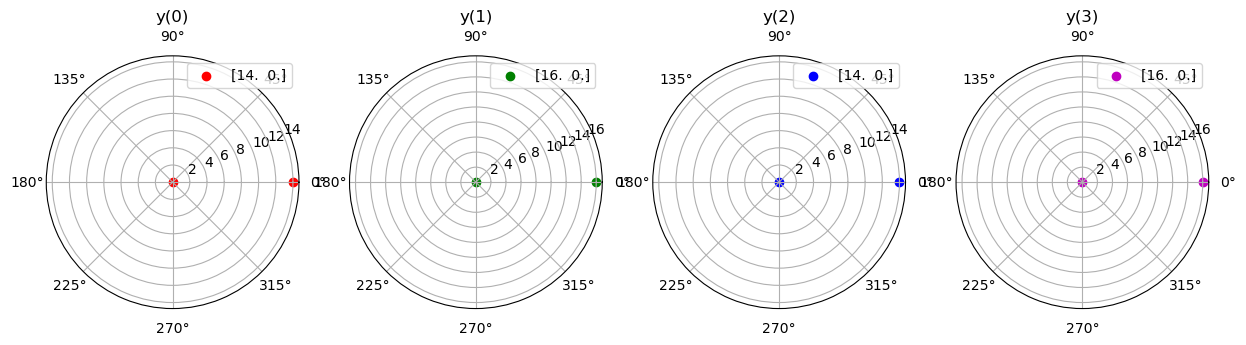

In [15]:
def circular_convolve(f, g):
    N = len(f)
    y = np.zeros(N)
    results = []
    for i in range(N):
        for j in range(N):
            k = (i-j) % N
            y[i] += f[j] * g[k]
        results.append(np.copy(y))  # Guardar resultado de la convolución en cada iteración
    return results

# Definir las señales de entrada f y g
f = np.array([1,2,3,4])
g = np.array([2,1,2,1]) 

# Señales de mismo tamaño
if len(f) != len(g):
    N = max(len(f), len(g))
    f.resize(N)
    g.resize(N)

# Convertir  a coordenadas polares
f_circ = np.array([np.complex(f[i], 0) for i in range(len(f))])
g_circ = np.array([np.complex(g[i], 0) for i in range(len(g))])

# Calcular la convolución circular
results = circular_convolve(f, g)

# Convertir señal resultante a coordenadas polares
y_circ = np.array([np.complex(results[-1][i], 0) for i in range(len(results[-1]))])

# figura de subplots por cada iteración
fig, axs = plt.subplots(1, len(results), figsize=(15, 5), subplot_kw={'projection': 'polar'})


colors = ['r', 'g', 'b','m']
for i, y in enumerate(results):
    # Convertir señal resultante a coordenadas polares
    y_circ = np.array([np.complex(y[i], 0) for i in range(len(y))])
    
    # Convertir coordenadas polares a cartesianas y graficar 
    cartesianas = np.array([(z.real * np.cos(np.angle(z)), z.real * np.sin(np.angle(z))) for z in y_circ])
    axs[i].scatter(np.angle(cartesianas[i]), np.abs(cartesianas[i]), color=colors[i], label='{}'.format(cartesianas[i]))  
    axs[i].legend(loc='upper right')
    axs[i].set_title('y({})'.format(i))
    
print('f(n)',f)
print('g(n)',g)
print('y(n)',y)

plt.show()

Se realizó la gráfica en forma circular para simular el concepto de convolucion circular

**Esta convolución también se puede observar en la siguiente grafica los pulsos permiten notar de manera más clara el resultado de la convolución entre las dos señales**

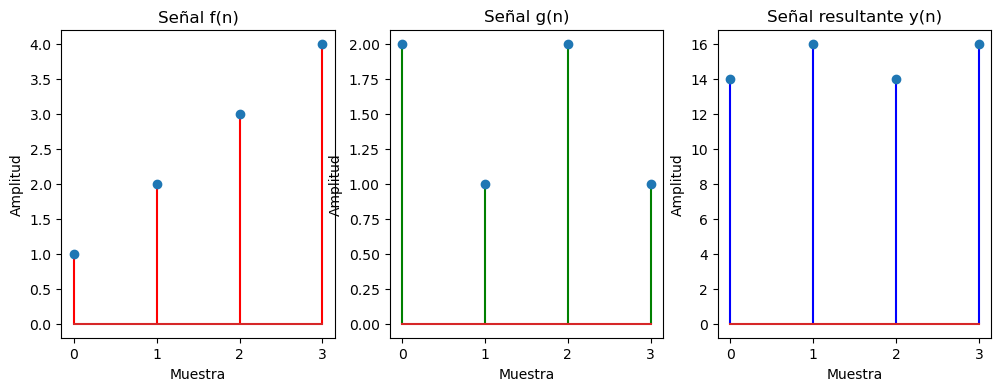

In [14]:
# figura para mostrar las señales en coordenadas polares
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Mostrar la señal de entrada f
axs[0].set_title("Señal f(n)")
axs[0].stem(np.arange(len(f)), f, 'ro-')
axs[0].set_xlabel("Muestra")
axs[0].set_ylabel("Amplitud")

# Mostrar la señal de entrada g
axs[1].set_title("Señal g(n)")
axs[1].stem(np.arange(len(g)), g, 'go-')
axs[1].set_xlabel("Muestra")
axs[1].set_ylabel("Amplitud")

# Mostrar la señal resultante y
axs[2].set_title("Señal resultante y(n)")
axs[2].stem(np.arange(len(y)), np.real(y_circ), 'bo-')
axs[2].set_xlabel("Muestra")
axs[2].set_ylabel("Amplitud")

plt.show()


Al usar la misma secuencia del punto de transformada discreta de Fourier, se observa como se cumple que el producto de dos DFTS es equivalente a una convolución circular en el tiempo.

**Transformada rápida de Fourier FFT**

In [28]:
# Secuencia de entrada
x = np.array([1, 5, 3, 2, 4, 6, 7, 8])

# Realizar la FFT
X = np.fft.fft(x)

# Obtener la magnitud de la FFT
mag_X = np.abs(X)

# Crear un vector de frecuencias
freqs = np.fft.fftfreq(len(X))

X = [complex(val) for val in X]

print('La FFT es:',X)

La FFT es: [(36+0j), (0.5355339059327382+8.949747468305834j), (-5-1j), (-6.535533905932738+0.9497474683058336j), (-6+0j), (-6.535533905932738-0.9497474683058336j), (-5+1j), (0.5355339059327382-8.949747468305834j)]


**Para una señal**

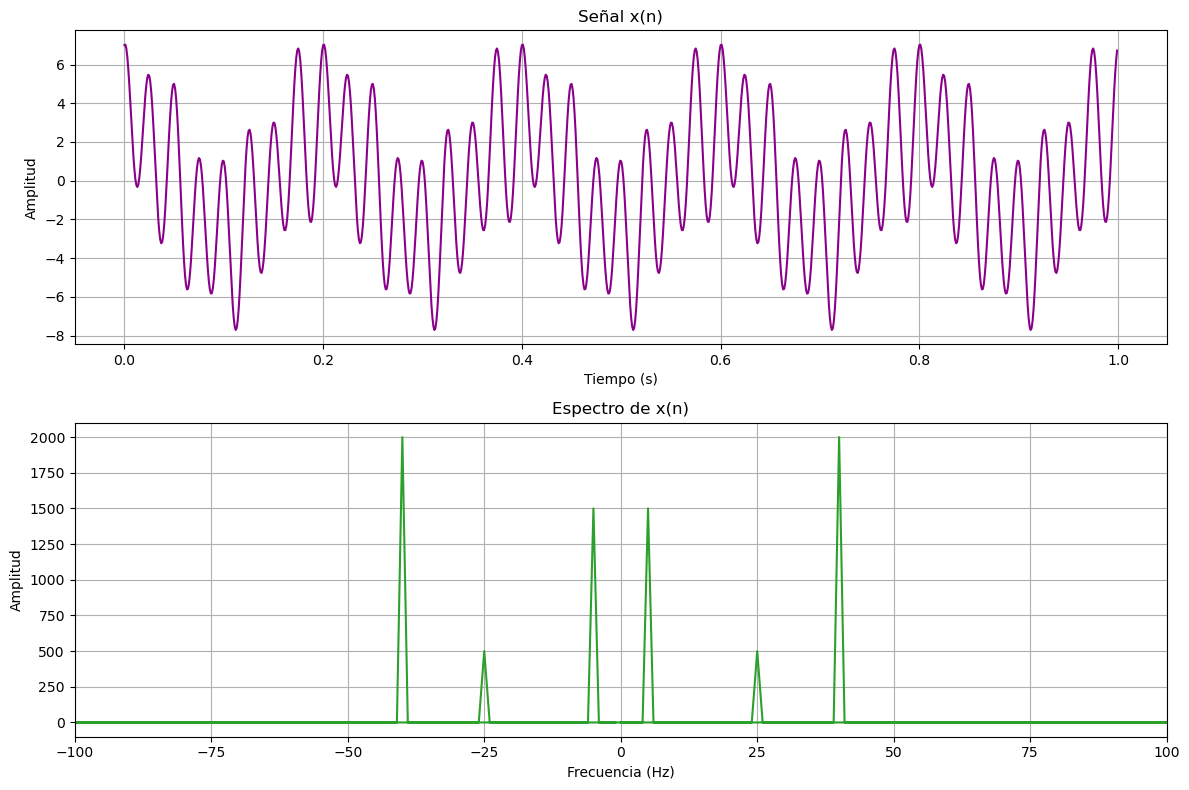

In [55]:
fs = 1000  # Frecuencia de muestreo
f = 25 # Frecuencia de la señal
f1 = 40
f3= 5
t = np.arange(0, 1, 1/fs)  # Vector de tiempo

# Señal
sig = np.sin(2*np.pi*f*t) + 4*np.cos(2*np.pi*f1*t) +  3*np.cos(2*np.pi*f3*t)


# Calculamos la FFT
fftsig = np.fft.fft(sig)

# Calculamos las frecuencias correspondientes a cada componente de la FFT
freq = np.fft.fftfreq(len(sig), 1/fs)


plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(t, sig, color='darkmagenta')
plt.title('Señal x(n)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(2,1,2)
plt.plot(freq, np.abs(fftsig), color='#2ca02c')
plt.title('Espectro de x(n)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(-100,100)
plt.grid()
plt.tight_layout()
plt.show()

Se puede observar la simetria al tener 4 picos y como cada uno esta ubicado en la frecuencia que compone la señal, 5, 25, 40 Hz